# Deskripsi Proyek

1. Mengulas pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka.
2. Menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.
3. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.
4. Merencanakan kampanye untuk tahun 2017 dari data Tahun 2016

## Pra Pemprosesan

### Library yang dibutuhkan

In [ ]:
# Memuat Seluruh Library
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st


### Memuat dan menampilan informasi data

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.shape

(16715, 11)

In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
#melihat duplicated pada data
df.duplicated().sum()

0

In [ ]:
#melihat nilai hilang di setiap kolom
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

KESIMPULAN :

1. Data memiliki 16715 baris, 11 kolom
2. Data asli tidak memiliki baris duplikat
3. Data asli memiliki nilai yang hilang pada kolom Year_of_Release,Critic_Score,User_Score,Rating.
4. Data asli memiliki kolom dengan tipe yang salah, seperti Year_of_Release dan User_Score
5. Data asli memiliki nama kolom yang kurang tepat, dan perlu di rubah ke lower case

### Memperbaiki Tipe Data

#### merubah nama kolom menjadi lower case

In [ ]:
#Merubah semua nama kolom ke lowercase
df = df.rename(columns=str.lower)

In [ ]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15682,Legendary,PC,2008.0,Shooter,0.0,0.01,0.0,0.0,50.0,6.6,M


#### Merubah Tipe data kolom User_score ke float

In [ ]:
#Cek nilai unique pada user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
#menghitung banyak nya nilai tbd 
df[df['user_score']== 'tbd']['user_score'].count()

2424

Dikarenakan Nilai kolom user_score memiliki nilai 'tbd' tipe data tidak bisa di rubah langsung, dan nilai tbd tidak bisa di isi 0/nan dikarenakan nilai tbd bukan nilai score 0/nan dan memiliki data tbd sebanyak 2424 data, oleh karena itu nilai tbd akan diisi dengan -1 untuk membedakan antara nilai 0 dan nan.

In [ ]:
#merubah nilai tbd menjadi -1
df.loc[df['user_score']=='tbd','user_score'] = -1

In [ ]:
#cek kembali nilai unique
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', -1, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
#merubah tipe data user_score menjadi float
df['user_score'] = df['user_score'].astype('float')

In [ ]:
#cek tipe data user_score
df['user_score'].dtype

dtype('float64')

#### Merubah Tipe Data year_of_release ke integer

In [ ]:
# cek nilai unique
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Dikarenakan data pada kolom year_of_release memiliki nilai 'nan' maka tidak bisa langsung dirubah, oleh karena itu diperlukan untuk merubah data 'nan' menjadi 0.

In [ ]:
#merubah nilai nan menjadi 0
df['year_of_release'] = df['year_of_release'].fillna(0)

In [ ]:
#merubah tipe data year_of_release menjadi integer
df['year_of_release'] = df['year_of_release'].astype('int')

In [ ]:
#cek tipe data year_of_release
df['year_of_release'].dtype

dtype('int64')

In [ ]:
#cek kembali tipe data seluruh kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Mengisi atau Menghapus nilai yang hilang di setiap kolom

#### Kolom name

In [ ]:
#cek banyak nya nilai yang hilang pada kolom name
df['name'].isna().sum()

2

In [ ]:
#melihat kolom name yang memiliki nilai hilang
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
#Drop nilai yang hilang pada kolom name
df.dropna(subset=['name'],inplace=True)

In [ ]:
#cek kembali nilai yang hilang
df['name'].isna().sum()

0

dikarenakan nilai yang hilang pada kolom name hanya 2 data, dan nilai yang hilang tidak bisa kita ganti. maka nilai yang hilang pada kolom name akan kita drop

#### kolom critic_score

In [ ]:
#melihat banyak nya nilai yang hilang
df['critic_score'].isna().sum()

8576

In [ ]:
#cek nilai unique
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
#mengisi nilai yang hilang pada kolom critic score dengan 0
df['critic_score'] = df['critic_score'].fillna(0)

In [ ]:
df['critic_score'].isna().sum()

0

Dikarenakan nilai yang hilang pada critic_score adalah game yang belum di beri nilai oleh kritikus, oleh karena itu nilai yang hilai akan di isi 0

#### kolom user_score

In [ ]:
#cek nilai yang hilang pada user score
df['user_score'].isna().sum()

6699

In [ ]:
#cek nilai 0 pada kolom user score
df[df['user_score'] == 0]['user_score'].count()

1

In [ ]:
#mengisi nilai yang hilang pada kolom critic score dengan 0
df['user_score'] = df['user_score'].fillna(0)

In [ ]:
#cek kembali nilai yang hilang
df['user_score'].isna().sum()

0

Dikarenakan nilai 0 pada kolom user score hanya 1 data, dan data memiliki nilai yang hilang sebanyak 6699 data, oleh karena itu kolom user score yang memiliki data 0 dan nan disatukan, yang beranggapan bahwa game tersebut belum memiliki score oleh user.

### Total Penjualan setiap game di semua wilayah

In [ ]:
#Total semua sales ke kolom terpisah
df['all_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [ ]:
#Reset Index pada data 
df = df.reset_index(drop=True)

KESIMPULAN PRA PEMPROSESAN

## Analisis Data

### Penyebaran Perilisan Game 

In [ ]:
#Meninjau banyak nya game yang dirilis berdasarkan tahun
group_year = df.groupby('year_of_release')['name'].count().reset_index().rename(columns={'name':'jumlah_game'})
group_year.head()

,year_of_release,jumlah_game
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17


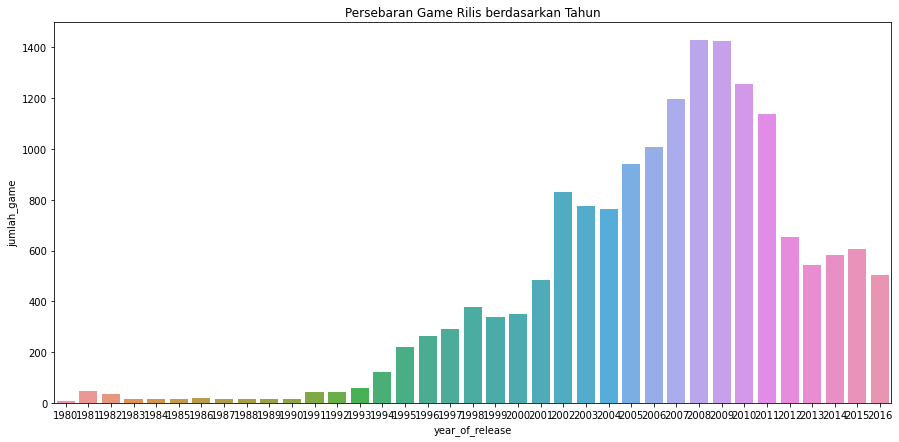

In [ ]:
#membuat grafik tanpa melibatkan nilai 0 
plt.figure(figsize=(15,7),frameon=True)
plt.title('Persebaran Game Rilis berdasarkan Tahun')
sns.barplot(data = group_year[group_year['year_of_release']!= 0],
             x='year_of_release',y='jumlah_game')

plt.show()

Dapat dilihat pada grafik bahwa puncak terbanyak perilisan game ada pada tahun 2008 dan 2009,

In [ ]:
def period(data):
    year = data['year_of_release']
    if year == 0 :
        return 0
    if year <=1989 :
        return '1980-1989'
    if year <=1999 :
        return '1990-1999'
    if year <=2009 :
        return '2000-2009'
    if year <=2019 :
        return '2010-2019'
group_year['period'] = group_year.apply(period,axis=1)

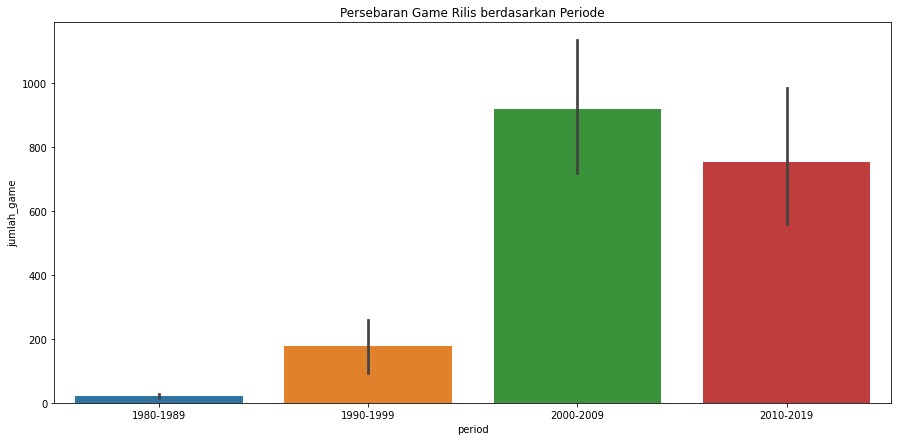

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('Persebaran Game Rilis berdasarkan Periode')
sns.barplot(data = group_year[group_year['year_of_release']!= 0],
             x='period',y='jumlah_game')

plt.show()

Dalam Grafik Periode, menunjukan bahwa awal perilisan Game pada tahun 1980'an,puncak banyak nya perilisan game pada tahun 2000'an, dan mengalami penurunan perilisan di tahun 2010-2019

### Penyebaran Berdasarkan Platform

In [ ]:
#Meninjau banyak nya game yang dirilis berdasarkan tahun
group_platform = df.groupby('platform').agg({'all_sales':'sum',
                                            'name':'count'}).reset_index().rename(
    columns={'all_sales':'total_sales',
            'name':'jumlah_game'}).sort_values(by='total_sales',ascending=False).reset_index(drop=True)
group_platform.head()

,platform,total_sales,jumlah_game
0,PS2,1255.77,2161
1,X360,971.42,1262
2,PS3,939.65,1331
3,Wii,907.51,1320
4,DS,806.12,2151


Dapat dilihat bahwa Platform PS2 memiliki jumlah penjualan terbesar dengan total penjualan 1255.77 dan jumlah game sebanyak 2161 game.

#### Penyebaran Platform PS2

In [ ]:
#Mengelompokan Platform Ps2 berdasarkan tahun
group_ps2 = df[df['platform'] == 'PS2'].groupby('year_of_release')['name'].count().reset_index().rename(columns=
                                                                                                        {'name':'jumlah_game'})
group_ps2

,year_of_release,jumlah_game
0,0,34
1,2000,82
2,2001,185
3,2002,280
4,2003,256
5,2004,259
6,2005,260
7,2006,259
8,2007,214
9,2008,191


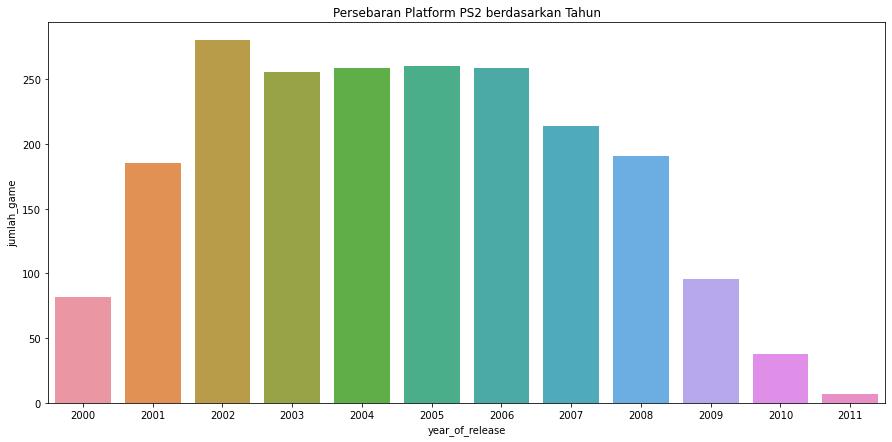

In [ ]:
#membuat grafik tanpa melibatkan nilai 0 
plt.figure(figsize=(15,7),frameon=True)
plt.title('Persebaran Platform PS2 berdasarkan Tahun')
sns.barplot(data = group_ps2[group_ps2['year_of_release']!= 0],
             x='year_of_release',y='jumlah_game')

plt.show()

Hasil dari grafik menandakan bahwa :
1. Platform PS2 diawali pada tahun 2000 dan bertahan sampai 2011, 11 tahun lamanya.
2. dengan banyaknya perilisan game pada tahun 2002 
3. Pada tahun 2003 - 2006 jumlah perilisan game mengalam stagnan. yang menandakan puncak dari ketenaran platform
4. setelah tahun 2007 perilisan Game pada platform PS2 sudah mulai menurun dan berhenti di 2011.

#### Mencari Platform yang sudah tidak populer

In [ ]:
df_isna_year0 = df[df['year_of_release'] != 0].reset_index(drop=True)
df_isna_year0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01


In [ ]:
group_platform_year = df_isna_year0.pivot_table(index='platform',
                                values='year_of_release',
                                aggfunc={'year_of_release':[min,max]}).reset_index().rename(columns={
    'max':'max_year','min':'min_year'
})
group_platform_year['age'] = group_platform_year['max_year']-group_platform_year['min_year']
group_platform_year.sort_values(by='age',ascending=False).reset_index(drop=True).head()

,platform,max_year,min_year,age
0,PC,2016,1985,31
1,DS,2013,1985,28
2,GB,2001,1988,13
3,X360,2016,2005,11
4,PSP,2015,2004,11


In [ ]:
#Menggabungkan 2 data group_paltform dengan group_flatform_year
merge_group_platform = group_platform.merge(group_platform_year,how='outer',
                                            on='platform').sort_values(by='jumlah_game',
                                                                       ascending=False)
#platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun
merge_group_platform[merge_group_platform['max_year']!=2016].head().reset_index(drop=True)

,platform,total_sales,jumlah_game,max_year,min_year,age
0,PS2,1255.77,2161,2011,2000,11
1,DS,806.12,2151,2013,1985,28
2,PSP,294.05,1209,2015,2004,11
3,PS,730.86,1197,2003,1994,9
4,XB,257.74,824,2008,2000,8


Dapa dilihat dari data bahwa:
1. Game PS2 yang memiliki penjualan dan perilisan game terbanyak pada data, setelah tahun 2012 tidak memiliki penjualan apapun
2. Game DS dengan usia platform hingga 28 tahun, hingga tahun 2013 sudah tidak memiliki penjualan apapun

#### selisih platform baru dan lama untuk memudar

In [ ]:
lifetime = df_isna_year0.groupby(['platform','year_of_release']).agg({'name':'count','all_sales':'sum'}).reset_index()
lifetime = lifetime.merge(group_platform_year,on='platform').sort_values(by='min_year').reset_index(drop=True)
lifetime = lifetime.rename(columns={'name':'jumlah_game'})

In [ ]:
#membuat group pada kolom age
def group(data):
    age = data['age']
    if age <= 5:
        return '0-5'
    elif age <=10:
        return '6-10'
    elif age <=15:
        return '11-15'
    elif age <=20:
        return '16-20'
    return '>20'

lifetime['group_age'] = lifetime.apply(group,axis=1)


In [ ]:
lifetime.head()

,platform,year_of_release,jumlah_game,all_sales,max_year,min_year,age,group_age
0,2600,1980,9,11.38,1989,1980,9,6-10
1,2600,1981,46,35.68,1989,1980,9,6-10
2,2600,1982,36,28.88,1989,1980,9,6-10
3,2600,1983,11,5.84,1989,1980,9,6-10
4,2600,1984,1,0.27,1989,1980,9,6-10


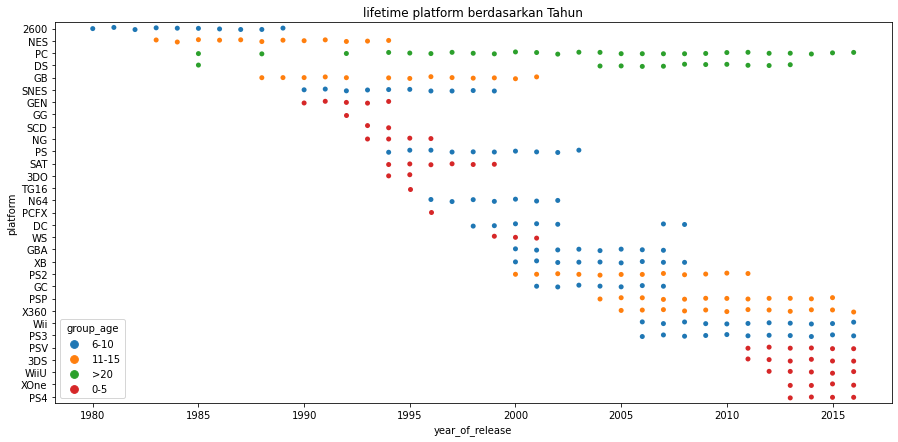

In [ ]:
#membuat grafik tanpa melibatkan nilai 0 
plt.figure(figsize=(15,7),frameon=True)
plt.title('lifetime platform berdasarkan Tahun')
sns.stripplot(data = lifetime, x='year_of_release',
             y='platform',
             hue='group_age',)


plt.show()

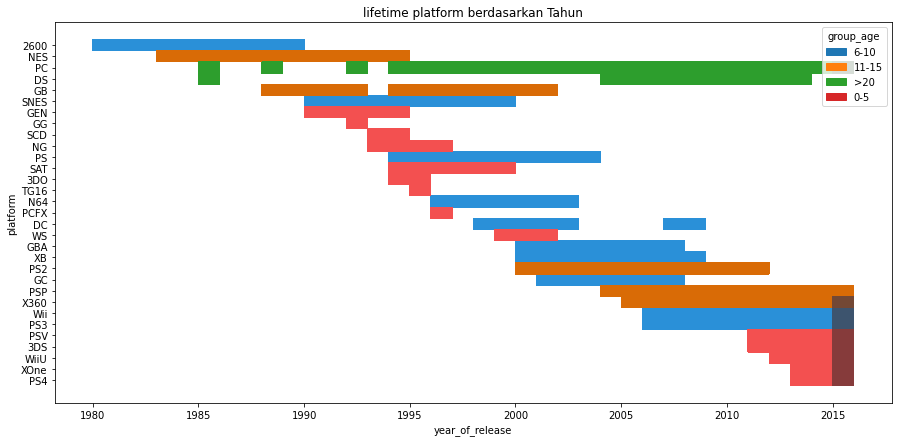

In [ ]:
#membuat grafik tanpa melibatkan nilai 0 
plt.figure(figsize=(15,7),frameon=True)
plt.title('lifetime platform berdasarkan Tahun')
sns.histplot(data = lifetime, x='year_of_release',
             y='platform',
             hue='group_age',bins=36
            )

plt.show()

KESIMPULAN.
Dari kedua data grafik lifetime di atas bahwa:
1. Kebanyakan Platform baru akan muncul setelah 1-3 tahun dari paltform sebelum nya
2. Lifetime dari platform kebanyakan bertahan di 0-5 tahun dan akhirnya memudar
3. Periode umur diambil berdasarkan setiap 5 tahun

#### Platform dengan penjualan terbanyak

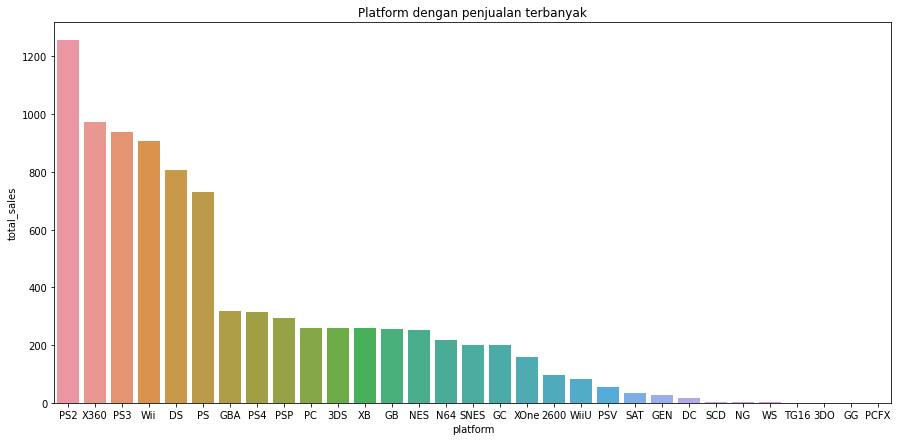

In [ ]:
#membuat grafik tanpa melibatkan nilai 0 
plt.figure(figsize=(15,7),frameon=True)
plt.title('Platform dengan penjualan terbanyak')
sns.barplot(data = group_platform,
             y='total_sales',
             x='platform'
            )

plt.show()

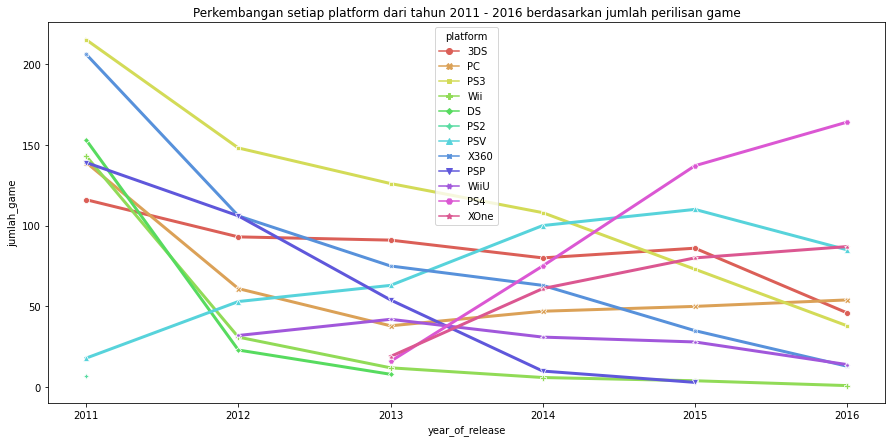

,jumlah_game,year_of_release
platform,,
PS4,301,2016
PSV,195,2016
XOne,167,2016
3DS,132,2016
PS3,111,2016


In [ ]:
# membuat grafik tanpa melibatkan nilai 0 
plt.figure(figsize=(15,7),frameon=True)
plt.title('Perkembangan setiap platform dari tahun 2011 - 2016 berdasarkan jumlah perilisan game')
sns.lineplot(data = lifetime[lifetime['year_of_release']>=2011].sort_values(by='year_of_release'), x='year_of_release',
             y='jumlah_game',hue='platform',style="platform",markers=True, dashes=False,palette='hls',linewidth=3)


plt.show()
lifetime[lifetime['year_of_release']>=2015].groupby('platform').agg({'jumlah_game':'sum',
                                                                     'year_of_release':'max'}
                                                                   ).sort_values(by='jumlah_game',
                                                                                 ascending=False).head()

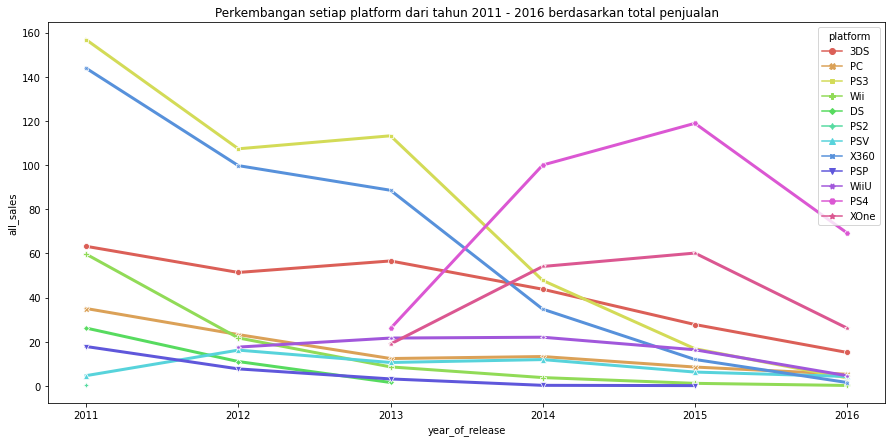

,all_sales,year_of_release
platform,,
PS4,188.15,2016
XOne,86.29,2016
3DS,42.92,2016
WiiU,20.95,2016
PS3,20.42,2016
PC,13.77,2016
X360,13.48,2016
PSV,10.50,2016
Wii,1.32,2016


In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('Perkembangan setiap platform dari tahun 2011 - 2016 berdasarkan total penjualan')
sns.lineplot(data = lifetime[lifetime['year_of_release']>=2011].sort_values(by='year_of_release'), x='year_of_release',
             y='all_sales',hue='platform',style="platform",markers=True, dashes=False,palette='hls',linewidth=3)


plt.show()

lifetime[lifetime['year_of_release']>=2015].groupby('platform').agg({'all_sales':'sum',
                                                                     'year_of_release':'max'}).sort_values(by='all_sales',
                                                                                                          ascending=False)

Kesimpulan di dapat bahwa :
1. Game yang memiliki Penjualan dan Perilisan game terbanyak pada tahun 2016 adalah PS4 dan XOne
2. PS4 baru berusia 3 tahun yang memiliki kemungkinan masih dapat bertahan 2 tahun lebih.

#### Boxplot Penjualan semua Platform

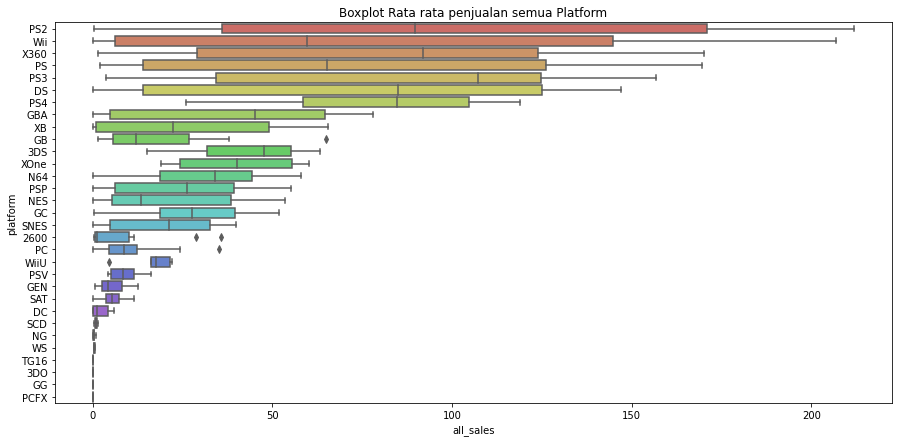

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('Boxplot Rata rata penjualan semua Platform')
sns.boxplot(data = lifetime.sort_values(by='all_sales',ascending=False),
            x='all_sales',
             y='platform',
            palette='hls',)


plt.show()
lifetime.groupby('platform').agg({'all_sales':'sum'}).sort_values(by='all_sales',ascending=False).head()

Kesimpulan di dapat bahwa:
1. Rata rata pendapatan setiap platform berbeda
2. Platform yang memiliki ratar rata total pendapatan tertinggi secara global adalah PS2
3. Beberapa platform tidak memiliki pendapatan yang sangat kecil/ gagal dalam menjual game nya.
4. Platform dengan Series Playstasion sangan menguntungkan secara rata rata global.

### Korelasi

#### Pengaruh ulasan terhadap penjualan game PS2 

In [ ]:
group_ps2 = df[df['platform'] == 'PS2'].reset_index(drop=True)

In [ ]:
group_ps2['avg_score'] = ((group_ps2['critic_score']/10)+group_ps2['user_score'])/2

In [ ]:
group_ps2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,avg_score
0,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81,9.25
1,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15,9.10
2,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97,8.95
3,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10,9.10
4,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65,8.70


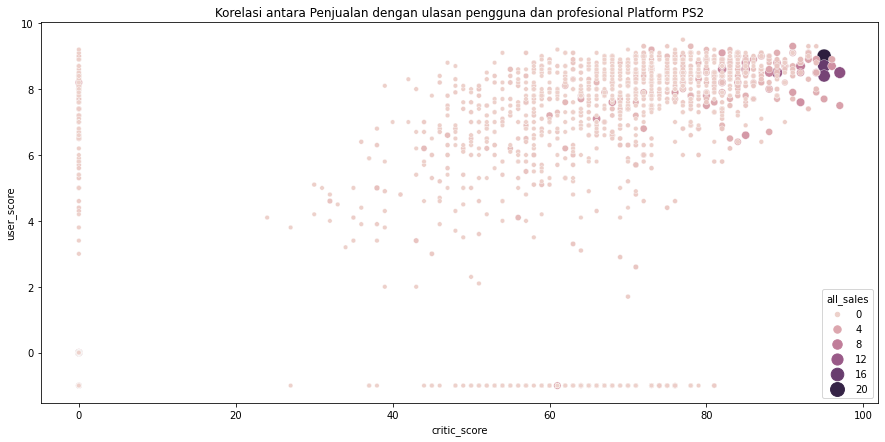

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('Korelasi antara Penjualan dengan ulasan pengguna dan profesional Platform PS2')
sns.scatterplot(data = group_ps2,
            x='critic_score',
             y='user_score',
            hue='all_sales',
               size='all_sales',
               sizes=(20, 200))
plt.show()

In [ ]:
print('Korelasi antara critic score dengan penjualan adalah',group_ps2['critic_score'].corr(group_ps2['all_sales']))
print('Korelasi antara user score dengan penjualan adalah',group_ps2['user_score'].corr(group_ps2['all_sales']))

Korelasi antara critic score dengan penjualan adalah 0.30072171894824934
Korelasi antara user score dengan penjualan adalah 0.2611100891130564


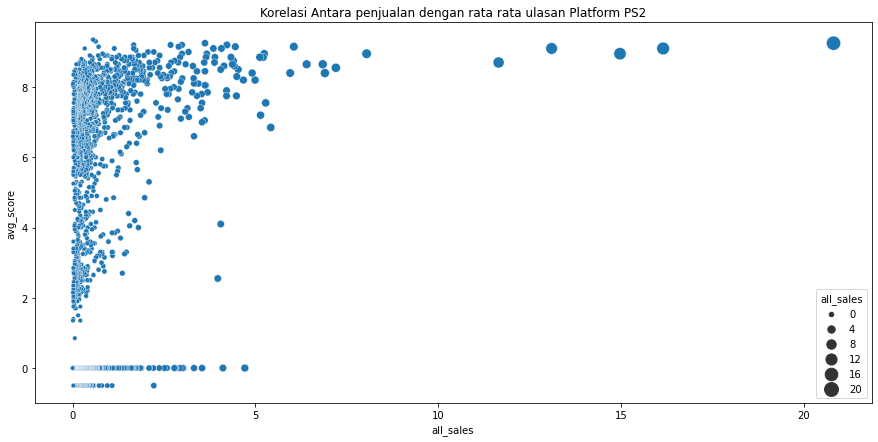

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('Korelasi Antara penjualan dengan rata rata ulasan Platform PS2')
sns.scatterplot(data = group_ps2,
            x='all_sales',
             y='avg_score',
               size='all_sales',
               sizes=(20, 200))
plt.show()

In [ ]:
print('Korelasi antara rata rata score dengan penjualan adalah',group_ps2['avg_score'].corr(group_ps2['all_sales']))

Korelasi antara rata rata score dengan penjualan adalah 0.2958611214744328


Kesimpulan Platform PS2di dapat bahwa:
1. Korelasi penjualan terhadap ulasan pengguna mendapatkan hasil 0.2611100891130564 yang berarti memiliki Hubungan Korelasi yang rendah
2. Korelasi penjualan terhadap ulasan profesional mendapatkan hasil 0.30072171894824934 yang berarti memiliki Hubungan Korelasi Moderat.
3. Korelasi penjualan terhadap rata rata ulasan mendapatkan hasil 0.2958611214744328 yang berarti memiliki Hubungan Korelasi Moderat.

#### Pengaruh Ulasan terhadap penjualan di platform lain

In [ ]:
group_xone = df[df['platform'] == 'XOne'].reset_index(drop=True)

In [ ]:
group_xone['avg_score'] = ((group_xone['critic_score']/10)+group_xone['user_score'])/2

In [ ]:
group_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,avg_score
0,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,NaN,7.39,0.00
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,8.80
2,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,6.75
3,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49,7.40
4,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22,7.50


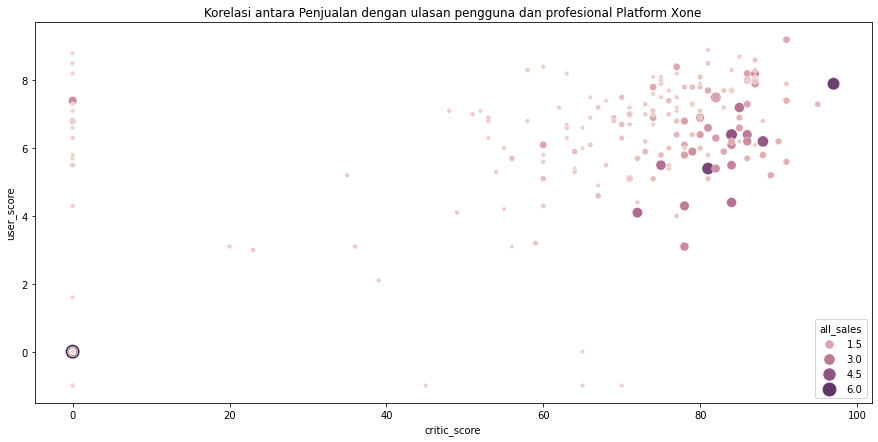

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('Korelasi antara Penjualan dengan ulasan pengguna dan profesional Platform Xone')
sns.scatterplot(data = group_xone,
            x='critic_score',
             y='user_score',
            hue='all_sales',
               size='all_sales',
               sizes=(20, 200))
plt.show()

In [ ]:
print('Korelasi antara critic score dengan penjualan adalah',group_xone['critic_score'].corr(group_xone['all_sales']))
print('Korelasi antara user score dengan penjualan adalah',group_xone['user_score'].corr(group_xone['all_sales']))

Korelasi antara critic score dengan penjualan adalah 0.2748391874944539
Korelasi antara user score dengan penjualan adalah 0.12187675934482874


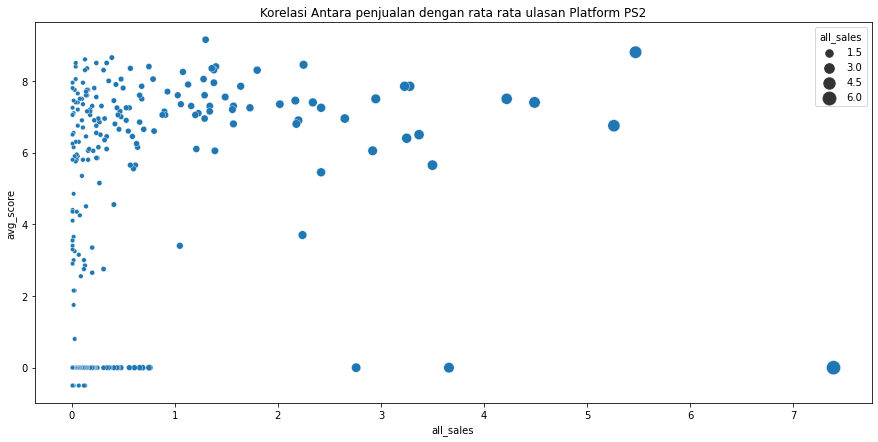

In [ ]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('Korelasi Antara penjualan dengan rata rata ulasan Platform PS2')
sns.scatterplot(data = group_xone,
            x='all_sales',
             y='avg_score',
               size='all_sales',
               sizes=(20, 200))
plt.show()

In [ ]:
print('Korelasi antara rata rata score dengan penjualan adalah',group_xone['avg_score'].corr(group_xone['all_sales']))

Korelasi antara rata rata score dengan penjualan adalah 0.2155687497621633


Kesimpulan Platform Xone di dapat bahwa:
1. Korelasi penjualan terhadap ulasan pengguna mendapatkan hasil 0.12187675934482874 yang berarti memiliki Hubungan Korelasi yang rendah
2. Korelasi penjualan terhadap ulasan profesional mendapatkan hasil 0.2748391874944539 yang berarti memiliki Hubungan Korelasi Rendah.
3. Korelasi penjualan terhadap rata rata ulasan mendapatkan hasil 0.2155687497621633 yang berarti memiliki Hubungan Korelasi Rendah.
4. Jika dibandingkan dengan Korelasi platform Ps2, korelasi Platform Xone lebih kecil sedikit. tetapi secara garis besar tidak terlalu adanya perbedaan

### Distribusi Genre Game terhadap Penjualan

In [ ]:
df.groupby('genre').agg({'all_sales':'sum'}).sort_values(by='all_sales',ascending=False)

,all_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


Kesimpulan yang didapat bahwa:
1. Genre Action dan Sport memiliki penjualan Tertinggi secara keseluruhan.
2. Game Adventure dan Strategy memiliki penjualan Terendah secara keseluruhan.

### Pemrofilan pengguna untuk masing-masing wilayah 

Variasi pangsa pasar dari satu wilayah ke wilayah lainnya.

In [ ]:
#Wilayah NA
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head()

,platform,na_sales
0,X360,602.47
1,PS2,583.84
2,Wii,496.90
3,PS3,393.49
4,DS,382.40


In [ ]:
#Wilayah EU
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()

,platform,eu_sales
0,PS2,339.29
1,PS3,330.29
2,X360,270.76
3,Wii,262.21
4,PS,213.61


In [ ]:
#Wilayah JP
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()

,platform,jp_sales
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,3DS,100.67


Kesimpulan yang didapat bahwa:
1. Dari ketiga Wilayah NA,EU dan JP,platform PS2 selalu masuk di 5 besar penjualan.
2. Platform X360,PS3, DS, Wii masuk di 2 dari 3 wilayah yang ada.
3. Penjualan tertinggi di masing masing wilayah adalah, NA = X360, EU = PS2, JP= DS.

### Rating ESRB terhadap penjualan

        na_sales  eu_sales  jp_sales
rating                              
E        1292.99    710.25    198.11
T         759.75    427.03    151.40
M         748.48    483.97     64.24
E10+      353.32    188.52     40.20
K-A         2.56      0.27      1.46
EC          1.53      0.11      0.00
AO          1.26      0.61      0.00
RP          0.00      0.08      0.00


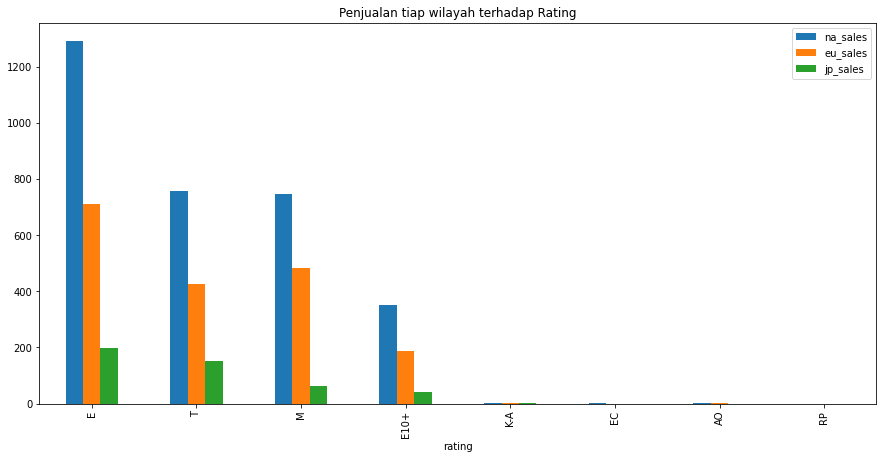

In [ ]:
df_rating = df.groupby('rating').agg({'na_sales':'sum',
                         'eu_sales':'sum',
                         'jp_sales':'sum'}).sort_values(by='na_sales',ascending=False)
df_rating.plot(kind='bar',figsize=(15,7),
              title='Penjualan tiap wilayah terhadap Rating')
print(df_rating)

Kesimpulan di dapat bahwa:
1. Penjualan Tertinggi di setiap wilayah adalah Rating E 
2. Rating ERSB memiliki pengaruh yang cukup besar terhadap penjulan,dapat dilihat pada grafik bahwa terjadi penurunan yang sangat drastis dari penjualan yang memiliki rating K.A, EC, AO dan RP
3. Rating EC,AO,Dan RP di wilayah JP tidak ada sama sekali penjualan.


## Pengujian Hipotesis

In [ ]:
#Fungsi meembuat rate dari rating
def rate(data):
    rating = data['rating']
    if rating == 'E':
        return 1
    elif rating =='T':
        return 2
    elif rating =='M':
        return 3
    elif rating =='E10+':
        return 4
    elif rating =='K-A':
        return 5
    elif rating =='EC':
        return 6
    elif rating =='AO':
        return 7
    elif rating =='RP':
        return 8
    return 0
df['rate_number'] = df.apply(rate,axis=1)

### Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
H0 adalah Rata rata rating pengguna platform Xbox One dan PC tidak sama

H1 adalah Rata rata rating pengguna platform Xbox One dan PC sama

In [ ]:
#memisahkan pengguna PC dan XOne
group_pc= df[df['platform'] == 'PC']
group_xone_hip = df[df['platform'] == 'XOne'] 

In [ ]:
group_pc.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rate_number
9360,Dragon Age Origins: Awakening,PC,2010,Role-Playing,0.01,0.1,0.0,0.02,0.0,0.0,NaN,0.13,0


In [ ]:
group_xone_hip.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rate_number
16033,Pac-Man Championship Edition 2 + Arcade Game S...,XOne,2016,Action,0.01,0.0,0.0,0.0,0.0,0.0,NaN,0.01,0


In [ ]:
#Varians 2 Rating
var_xone_rating = np.var(group_xone_hip['rate_number'])
var_pc_rating = np.var(group_pc['rate_number'])
print('Varians dari kolom rating platform xone adalah :',var_xone_rating) 
print('Varians dari kolom rating platform pc adalah :',var_pc_rating)

Varians dari kolom rating platform xone adalah : 1.9353865823075282
Varians dari kolom rating platform pc adalah : 1.690081756047375


Selisih antar varians dari kedua rating tidak berbeda jauh , 

Pengujian Hipotesis menggunakan Rata rata Dua populasi statistik dengan equal var = True

In [ ]:
#melihat sebaran Rating Xone
group_xone_hip['rate_number'].value_counts()

3    70
0    61
1    45
2    40
4    31
Name: rate_number, dtype: int64

In [ ]:
#melihat sebaran Rating PC
group_pc['rate_number'].value_counts()

2    297
3    256
0    200
1    138
4     76
8      3
5      2
6      2
Name: rate_number, dtype: int64

In [ ]:
hip_rating_platform = st.ttest_ind(group_xone_hip['rate_number'], group_pc['rate_number'],equal_var = True)
alpha = 0.05
print('p-value: ', hip_rating_platform.pvalue)

if hip_rating_platform.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol") 

p-value:  0.6622823391888549
Kita tidak dapat menolak hipotesis nol


Dapat dilihat dari hasil p-value dari rate_number adalah 0.6622823391888549, lebih dari alpha yang kita tentukan, menandakan bahwa Kita tidak dapat menolak hipotesis nol atau, Rata rata rating pengguna platform Xbox One dan PC tidak sama.

### Rata-rata rating pengguna genre Action dan Sports berbeda.
H0 adalah Rata rata rating genre Action dan Sports sama

H1 adalah Rata rata rating genre Action dan Sports tidak sama

In [ ]:
#memisahkan pengguna PC dan XOne
group_action= df[df['genre'] == 'Action']
group_sports = df[df['genre'] == 'Sports'] 

In [ ]:
group_action.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rate_number
9295,G.I. Joe: The Rise of Cobra,DS,2009,Action,0.11,0.01,0.0,0.01,47.0,7.5,E10+,0.13,4


In [ ]:
group_sports.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rate_number
15325,G1 Jockey Wii,Wii,2007,Sports,0.0,0.0,0.02,0.0,0.0,0.0,NaN,0.02,0


In [ ]:
#Varians 2 Rating
var_sports = np.var(group_sports['rate_number'])
var_action = np.var(group_action['rate_number'])
print('Varians dari kolom rating genre sports adalah :',var_sports) 
print('Varians dari kolom rating genre action adalah :',var_action)

Varians dari kolom rating genre sports adalah : 0.8640011144357154
Varians dari kolom rating genre action adalah : 2.1627442993980437


In [ ]:
print('Perbedaan selisih variance antara genre sports dan genre action',var_action / var_sports * 100)

Perbedaan selisih variance antara genre sports dan genre action 250.31730437182893


Dikarenakan hasil Varians rating genre lebih dari 100% dari maka equal var = False

Pengujian Hipotesis menggunakan Persamaan Rata rata Dua populasi Statistik

In [ ]:
#melihat sebaran Rating Genre sports
group_sports['rate_number'].value_counts()

1    1188
0     839
2     198
4     107
3      16
Name: rate_number, dtype: int64

In [ ]:
#melihat sebaran Rating Genre sports
group_action['rate_number'].value_counts()

0    1181
2     681
3     608
4     481
1     416
6       1
7       1
Name: rate_number, dtype: int64

In [ ]:
hip_rating_genre = st.ttest_ind(group_sports['rate_number'], group_action['rate_number'],equal_var = False)
alpha = 0.05
print('p-value: ', hip_rating_genre.pvalue)

if hip_rating_genre.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol") 

p-value:  1.7749376768252596e-122
Kita menolak hipotesis nol


Dapat dilihat dari hasil p-value dari rate_number adalah 1.7749376768252596e-122, lebih kecil dari alpha yang kita tentukan, menandakan bahwa Kita menolak hipotesis nol atau, Rata rata rating genre Action dan Sports tidak sama. dan H1/Hipotesis alternatif yang di pakai.

## Kesimpulan Umum

Dari keseluruhan data Histori penjualan Game didapat beberapa poin sebagai berikut:
1. Pra Pemrosesan :
    1. Memperbaiki setiap data yang memiliki tipe data yang salah dan memperbaiki penamaan kolom menjadi lower case
    2. Menghapus nilai yang hilang, dikarenakan data tersebut tidak bisa digunakan, mengisi nilai yang hilang pada beberapa kolom dengan ketentuan yang memungkinkan.
    3. Menghitung Total Pendapatan di setiap wilayah sehingga data akhir bisa digunakan untuk menganalisa.
2. Aanalisa Data :
    1. Penyebaran Perilisan game tertinggi ada pada tahun 2008 dan 2009 secara global
    2. Secara global platform PS2 memiliki nilai penjualan dan nilai perilisan game Tertinggi hingga saat ini, tetapi popularitas nya mulai menurun di tahun 2009, dan sudah tidak merilis game pada tahun 2012
    3. Pada umumnya Perilisan Platform baru adalah 2-3 tahun dari platform sebelum nya dan Rata rata paltform bertahan di pasaran sekitar 0-5 tahun
    4. Rata rata pendapatan Platform sangat berbeda antara satu dengan yang lain nya, untuk seri PS memiliki Rata rata pendapatan tertinggi, sedangkan ada beberapa Platform yang memiliki sedikit sekali pendapatan.
    5. Korelasi antara Ulasan terhadap penjualan di seluruh Platform memiliki Korelasi positif yang Rendah.
3. Hipotesis :
    1. Rata-rata rating pengguna platform Xbox One dan PC mendapatkan hasil bahwa kita tidak dapat menolak Rata rata rating pengguna tidak sama, dikarenakan rating rata rata platform Xbox dan dan PC memiliki sebaran Rating yang sangat berbed.
    2. Pada Hipotesis Rata rata rating pengguna genre Action dan Sports mendapatkan hasil bahwa kita menolak rating rata rata nya sama,  dikarenakan penyebaran rating nya jauh berbeda.
4. Keseluruhan :
    1. Game yang memiliki Genre Action dan Sports memiliki nilai penjualan Tertinggi di panding genre lain nya
    2. Platform PS4 dan XOne memungkinkan masih eksis di tahun 2017, tetapi ada kemungkinan juga munculnya Platform baru di tahun 2017
    3. Game yang memiliki rating E sangan menguntungkan di setiap wilayah
    4. Wilayah yang memiliki penjualan tertinggi ada di wilayah NA
    5. Platform PC memiliki stabilitas yang tinggi juga, jadi ada kemungkinan game PC akan tetap eksis di tahun 2017